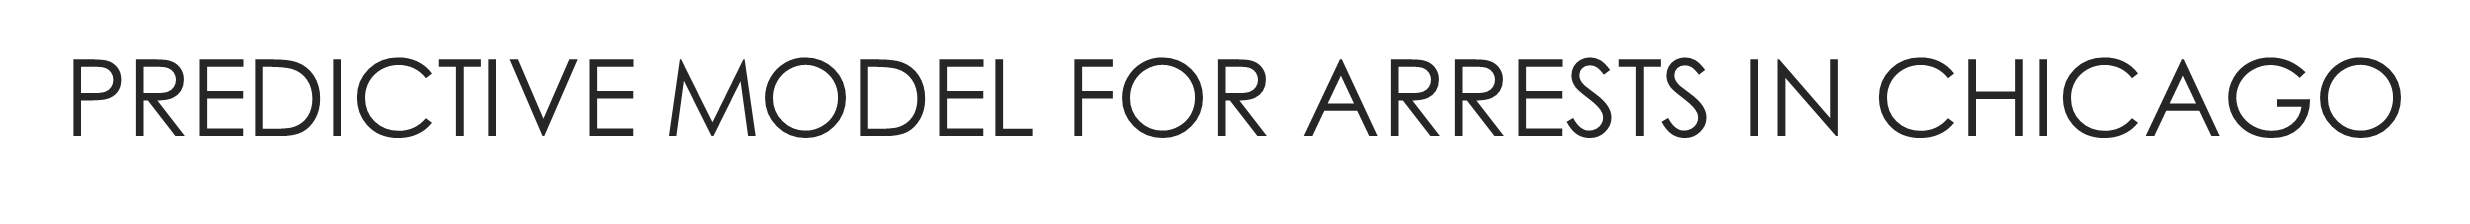
<img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://storage.googleapis.com/kaggle-organizations/19/thumbnail.jpg%3Fr=764">
<font color="green"><h1>Atharva Pathak | Darshan Redij | Gifty Reji | Muaaz Patel</h1></font>
<hr><font color="red"><h3>Under the Guidance of Subject-in-charge Mr. Viren Sahajwala</h3></font>


Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2015 to 2017. 

### Objective:
To explore crime data in Chicago and showcase the implementation of a predictive model for arrests in Chicago. <br/>
This could help the public institutions in 3 main ways:
- Better create public policy for correctional agencies
- Help focus the countermeasures on negatively impacted crime categories according to the prediction
- Guide the resource allocation by crime categories

### What to be done: 
1. Importing Libraries and dataset
2. Data Cleaning and Preprocessing
3. EDA
4. Modelling

# 1. Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import plotly.express as px
import datetime
from sklearn.preprocessing import OrdinalEncoder

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv("Chicago.csv")

In [3]:
# printing top 5 rows
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24.0,29,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3,20.0,42,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15,37.0,25,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15,28.0,25,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15,28.0,25,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
df.shape

(539814, 22)

There are 539814 records with 22 variables

In [5]:
df_crime = df.copy()

# 2. Data Cleaning and Preprocessing
Firstly, we will convert the Date column in the dataset in datetime format and then drop unncessary columns.<br/>
Second, we will remove first 6 characters from 'Block' column and sort the values according to the ID column. 

In [6]:
#Convert Dates to pandas datetime format
# df.Date = pd.to_datetime(df.Date, format= '%m/%d/%Y %I:%M:%S %p')
df['Date']= pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p' , errors='coerce')

#Setting the index to be the date
df.index=pd.DatetimeIndex(df.Date)

#Adding time hour for easy grouping
df['time_hour'] = df['Date'].apply(lambda x : x.hour)
df['month'] = df['Date'].apply(lambda x : x.month)
df['year'] = df['Date'].apply(lambda x : x.year)
df['Date_weekday'] = df.Date.map(lambda x:x.dayofweek) 

In [7]:
df.drop(columns = ['X Coordinate', 'Y Coordinate', 'Updated On', 'Location','Case Number'], inplace = True)
#Drop fbi code if you want to

In [8]:
df['Block'] = df['Block'].str[6:]

In [9]:
df.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,time_hour,month,year,Date_weekday
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 11:40:00,10508693,2016-05-03 11:40:00,S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24.0,29,08B,2016,41.864073,-87.706819,11,5,2016,1
2016-05-03 09:40:00,10508695,2016-05-03 09:40:00,S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3,20.0,42,08B,2016,41.782922,-87.604363,9,5,2016,1
2016-05-03 11:31:00,10508697,2016-05-03 11:31:00,W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15,37.0,25,24,2016,41.894908,-87.758372,11,5,2016,1
2016-05-03 10:10:00,10508698,2016-05-03 10:10:00,W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15,28.0,25,08B,2016,41.885687,-87.749516,10,5,2016,1
2016-05-03 10:00:00,10508699,2016-05-03 10:00:00,N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15,28.0,25,06,2016,41.886297,-87.761751,10,5,2016,1


In [10]:
# making a copy of the dataset and working on it
chicago = df.copy()
chicago.dtypes

ID                               int64
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                   int64
FBI Code                        object
Year                             int64
Latitude                       float64
Longitude                      float64
time_hour                        int64
month                            int64
year                             int64
Date_weekday                     int64
dtype: object

So, Out of 16 variables, we have 6 categorical variables, 1 datetime and 9 numerical variables. 

In [11]:
# changing the data types for 'community area' and 'domestic' 
chicago = chicago.astype({'Community Area':'int32'})
chicago = chicago.astype({'Domestic':'O'})

In [12]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 539814 entries, 2016-05-03 11:40:00 to 2016-05-03 11:38:00
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    539814 non-null  int64         
 1   Date                  539814 non-null  datetime64[ns]
 2   Block                 539814 non-null  object        
 3   IUCR                  539814 non-null  object        
 4   Primary Type          539814 non-null  object        
 5   Description           539814 non-null  object        
 6   Location Description  538746 non-null  object        
 7   Arrest                539814 non-null  bool          
 8   Domestic              539814 non-null  object        
 9   Beat                  539814 non-null  int64         
 10  District              539814 non-null  int64         
 11  Ward                  539812 non-null  float64       
 12  Community Area        53

##### Features:
<p><u>Case Number</u> — The Chicago Police Department RD Number (Records Division Number), which is unique to the
incident.<br/>
<u>Date </u>— Date when the incident occurred. <br/>
<u>Primary Type </u>— The primary description of the IUCR code. <br/>
<u>Arrest</u> — Indicates whether an arrest was made. <br/>
<u>Domestic</u> — Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act. <br/>
<u>Beat</u> — Indicates the beat where the incident occurred. A beat is the smallest police geographic area — each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at(3) <br/>
<u>District </u>— Indicates the police district where the incident occurred. See the districts at(4) <br/>
<u>Ward </u>— The ward (City Council district) where the incident occurred. See the wards at(5)<br/>
<u>FBI Code </u>— Indicates the crime classification as outlined in the FBI’s National Incident-Based Reporting System
(NIBRS). See the Chicago Police Department listing of these classifications at(6) <br/>
<u>Year </u> — Year the incident occurred. <br/>
<u>Latitude</u> — The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block. <br/>
<u>Longitude </u>— The longitude of the location where the incident occurred. This location is shifted from the actual location
for partial redaction but falls on the same block. <p>

### Looking for Missing Values

In [13]:
# count rows of missing data for each column
missing_number=chicago.isnull().sum().sort_values(ascending=False)

# Calculate percentage of null value
missing_percentage=missing_number*100/len(df)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head(10)

,missing number,missing percentage
Longitude,28716,5.319610
Latitude,28716,5.319610
Location Description,1068,0.197846
Ward,2,0.000370
ID,0,0.000000
year,0,0.000000
month,0,0.000000
time_hour,0,0.000000
Year,0,0.000000
FBI Code,0,0.000000


Here, we can see 3 columns are having missing records. We will be dropping the records with null values since the missing percentage is less than 6%.

In [14]:
# missing value treatment
chicago.dropna(inplace = True)

In [15]:
chicago.isnull().sum().sort_values(ascending=False).head()

ID           0
Ward         0
year         0
month        0
time_hour    0
dtype: int64

In [16]:
chicago.shape

(510372, 21)

Now, we can see that the dataset has reduced to 510372 records 

### Creating Universal dataset
As 'Community Area' was coded in numbers, We will be adding the area_code dataset to get the names of the community area.<br/>
Also, another csv file called population was added to get the population density. <br/>
We will load these two dataset, keep important features and merge them with the other one. <br/>

In [17]:
#Get communities from this csv
area_code = pd.read_csv('area_code.csv')
area_code.drop(['the_geom', 'PERIMETER', 'AREA', 'COMAREA_', 'COMAREA_ID', 'AREA_NUM_1', 'SHAPE_AREA', 'SHAPE_LEN'], axis=1, inplace = True)
area_code.head()

,AREA_NUMBE,COMMUNITY
0,35,DOUGLAS
1,36,OAKLAND
2,37,FULLER PARK
3,38,GRAND BOULEVARD
4,39,KENWOOD


In [18]:
#We get the names of the community areas
chicago = pd.merge(chicago,area_code,left_on = 'Community Area', right_on = 'AREA_NUMBE', how = 'outer')
chicago.drop(columns = 'AREA_NUMBE', inplace = True)
chicago.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,time_hour,month,year,Date_weekday,COMMUNITY
0,10508693,2016-05-03 11:40:00,S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24.0,29,08B,2016,41.864073,-87.706819,11,5,2016,1,NORTH LAWNDALE
1,10448396,2016-03-14 10:15:00,S TRUMBULL AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,1024,10,24.0,29,05,2016,41.854753,-87.711234,10,3,2016,0,NORTH LAWNDALE
2,10495378,2016-04-22 11:21:00,S CHRISTIANA AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VACANT LOT/LAND,True,False,1021,10,24.0,29,15,2016,41.859931,-87.709139,11,4,2016,4,NORTH LAWNDALE
3,10508736,2016-05-04 02:08:00,W GRENSHAW ST,051A,ASSAULT,AGGRAVATED: HANDGUN,APARTMENT,True,True,1133,11,24.0,29,04A,2016,41.867265,-87.713917,2,5,2016,2,NORTH LAWNDALE
4,10509116,2016-05-04 07:00:00,W ROOSEVELT RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,1132,11,24.0,29,24,2016,41.866202,-87.723080,7,5,2016,2,NORTH LAWNDALE


In [19]:
#Get population for each community from this csv
pop = pd.read_csv('population.csv')
pop.drop(['Area(sq mi.)', '2017 populationdensity (/sq mi.)','2017 populationdensity (/km2)', 'Name'], axis=1, inplace = True)
pop.head()

,Number,2017population,Area(km2)
0,1,"55,062","29,925"
1,2,"76,215","21,590.65"
2,3,"57,973","24,988.36"
3,4,"41,715","16,294.92"
4,5,"35,789","17,458.05"


In [20]:
#We get the 2017 population and area for each community
chicago = pd.merge(chicago,pop,left_on='Community Area',right_on = 'Number', how = 'outer')
chicago.drop(columns = {'Number', 'year'}, inplace = True)
chicago.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,time_hour,month,Date_weekday,COMMUNITY,2017population,Area(km2)
0,10508693,2016-05-03 11:40:00,S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24.0,29,08B,2016,41.864073,-87.706819,11,5,1,NORTH LAWNDALE,"35,947","11,198.44"
1,10448396,2016-03-14 10:15:00,S TRUMBULL AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,1024,10,24.0,29,05,2016,41.854753,-87.711234,10,3,0,NORTH LAWNDALE,"35,947","11,198.44"
2,10495378,2016-04-22 11:21:00,S CHRISTIANA AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VACANT LOT/LAND,True,False,1021,10,24.0,29,15,2016,41.859931,-87.709139,11,4,4,NORTH LAWNDALE,"35,947","11,198.44"
3,10508736,2016-05-04 02:08:00,W GRENSHAW ST,051A,ASSAULT,AGGRAVATED: HANDGUN,APARTMENT,True,True,1133,11,24.0,29,04A,2016,41.867265,-87.713917,2,5,2,NORTH LAWNDALE,"35,947","11,198.44"
4,10509116,2016-05-04 07:00:00,W ROOSEVELT RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,1132,11,24.0,29,24,2016,41.866202,-87.723080,7,5,2,NORTH LAWNDALE,"35,947","11,198.44"


In [21]:
chicago['2017population'] = chicago['2017population'].str.replace(',', '').astype(float)
chicago['Area(km2)'] = chicago['Area(km2)'].str.replace(',', '').astype(float)

#We divide population by area to get the population density
chicago['pop_dense'] = chicago['2017population']/chicago['Area(km2)']
chicago.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,time_hour,month,Date_weekday,COMMUNITY,2017population,Area(km2),pop_dense
0,10508693,2016-05-03 11:40:00,S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24.0,29,08B,2016,41.864073,-87.706819,11,5,1,NORTH LAWNDALE,35947.0,11198.44,3.210001
1,10448396,2016-03-14 10:15:00,S TRUMBULL AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,1024,10,24.0,29,05,2016,41.854753,-87.711234,10,3,0,NORTH LAWNDALE,35947.0,11198.44,3.210001
2,10495378,2016-04-22 11:21:00,S CHRISTIANA AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VACANT LOT/LAND,True,False,1021,10,24.0,29,15,2016,41.859931,-87.709139,11,4,4,NORTH LAWNDALE,35947.0,11198.44,3.210001
3,10508736,2016-05-04 02:08:00,W GRENSHAW ST,051A,ASSAULT,AGGRAVATED: HANDGUN,APARTMENT,True,True,1133,11,24.0,29,04A,2016,41.867265,-87.713917,2,5,2,NORTH LAWNDALE,35947.0,11198.44,3.210001
4,10509116,2016-05-04 07:00:00,W ROOSEVELT RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,1132,11,24.0,29,24,2016,41.866202,-87.723080,7,5,2,NORTH LAWNDALE,35947.0,11198.44,3.210001


In [22]:
# Numerical variables
chicago.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,510372.0,1.033940e+07,569691.857866,21714.000000,1.014088e+07,1.036000e+07,1.058767e+07,1.082334e+07
Beat,510372.0,1.145377e+03,690.762595,111.000000,6.130000e+02,1.024000e+03,1.711000e+03,2.535000e+03
District,510372.0,1.122445e+01,6.900544,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,510372.0,2.290320e+01,13.844631,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,510372.0,3.724729e+01,21.368873,1.000000,2.300000e+01,3.200000e+01,5.600000e+01,7.700000e+01
Year,510372.0,2.015491e+03,0.500044,2015.000000,2.015000e+03,2.015000e+03,2.016000e+03,2.017000e+03
Latitude,510372.0,4.184255e+01,0.085590,41.644590,4.176831e+01,4.186012e+01,4.190488e+01,4.202267e+01
Longitude,510372.0,-8.767202e+01,0.059509,-87.928909,-8.771524e+01,-8.766592e+01,-8.762807e+01,-8.752453e+01
time_hour,510372.0,6.849790e+00,3.494930,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
month,510372.0,6.631136e+00,3.337887,1.000000,4.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01


In [23]:
# Categorical Variables
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq,first,last
Arrest,539814,2,False,418129,NaT,NaT
Domestic,539814,2,False,453518,NaT,NaT
FBI Code,539814,26,06,120952,NaT,NaT
Primary Type,539814,33,THEFT,120952,NaT,NaT
Location Description,538746,133,STREET,124316,NaT,NaT
Description,539814,323,SIMPLE,56772,NaT,NaT
IUCR,539814,346,0486,50366,NaT,NaT
Block,539814,2379,S MICHIGAN AVE,5855,NaT,NaT
Date,539814,182139,2015-01-01 12:00:00,126,2015-01-01 01:00:00,2017-01-18 12:55:00


# 3. Exploratory Data Analysis

### Univariate Analysis

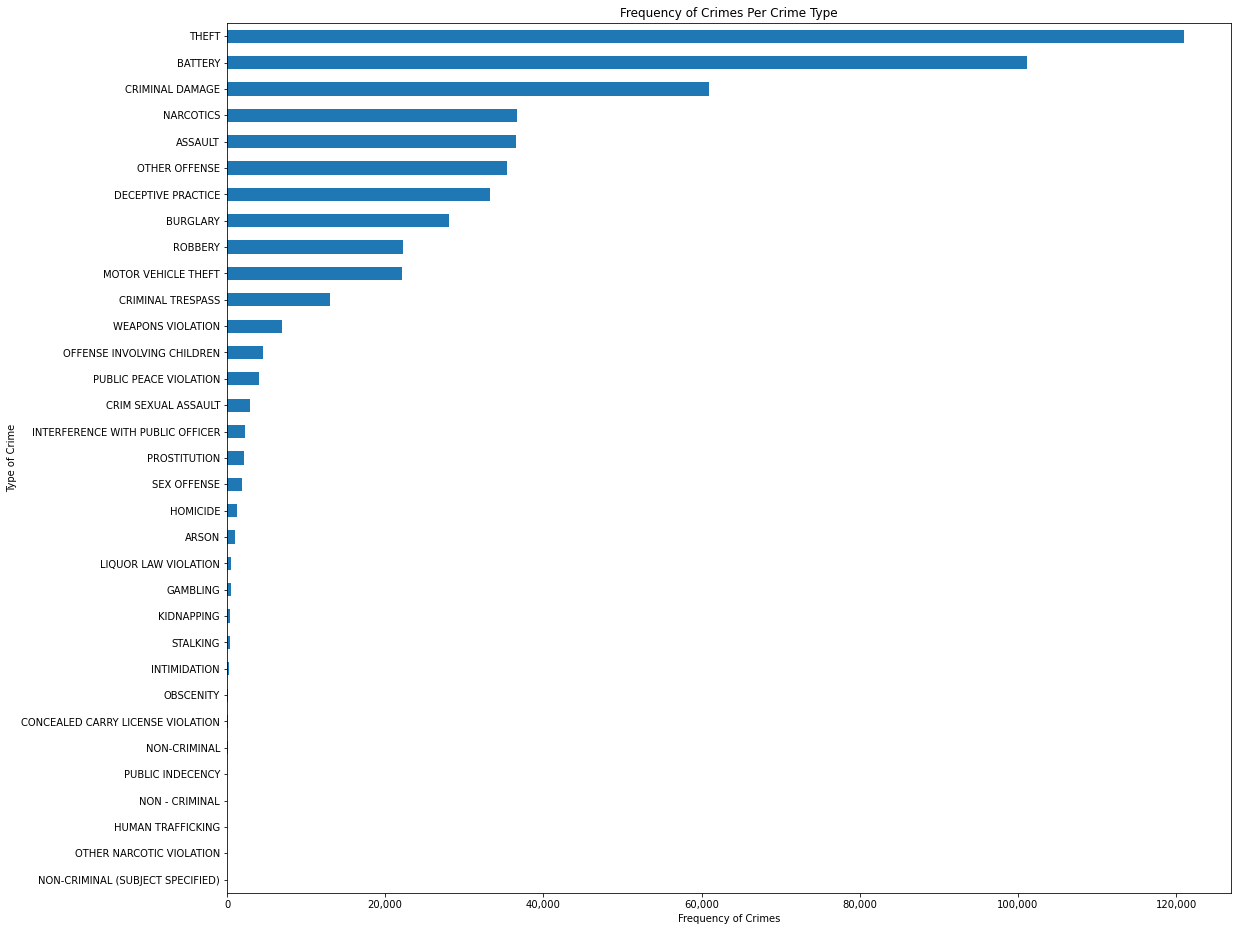

In [24]:
## Plot these for better visualization
crime_type_df = df['Primary Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

From the above visualization, We can see that the frequency of thefts in these 3 years have been more than 120,000.

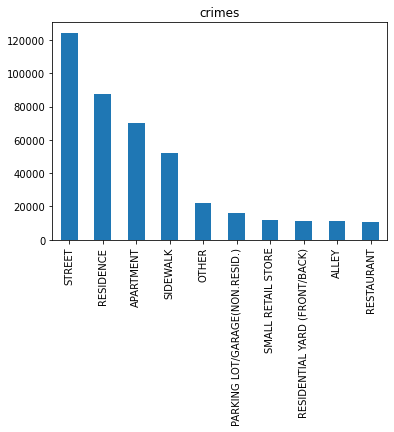

In [25]:
df['Location Description'].value_counts()[:10].plot.bar()
plt.title("crimes")
plt.show()

Most of the Crimes occur on Streets.

In [26]:
def fn_barplot(data,col):
    if data[col].dtype in ['object']:
        fig, ((ax1,ax2)) = plt.subplots(2, 1, figsize = (15,20))
        
        plot_df = df[['Arrest', col]].dropna()
        df_1 = plot_df.loc[plot_df['Arrest']==True]
        df_2 = plot_df.loc[plot_df['Arrest']==False]
        
        df_1.groupby(col)[col].count().nlargest(10).plot(kind = 'barh' , ax = ax1, title = 'Arrest: ' + col)
        df_2.groupby(col)[col].count().nlargest(10).plot(kind = 'barh' , ax = ax2, title = 'No Arrest: ' + col)
    return plt.show()

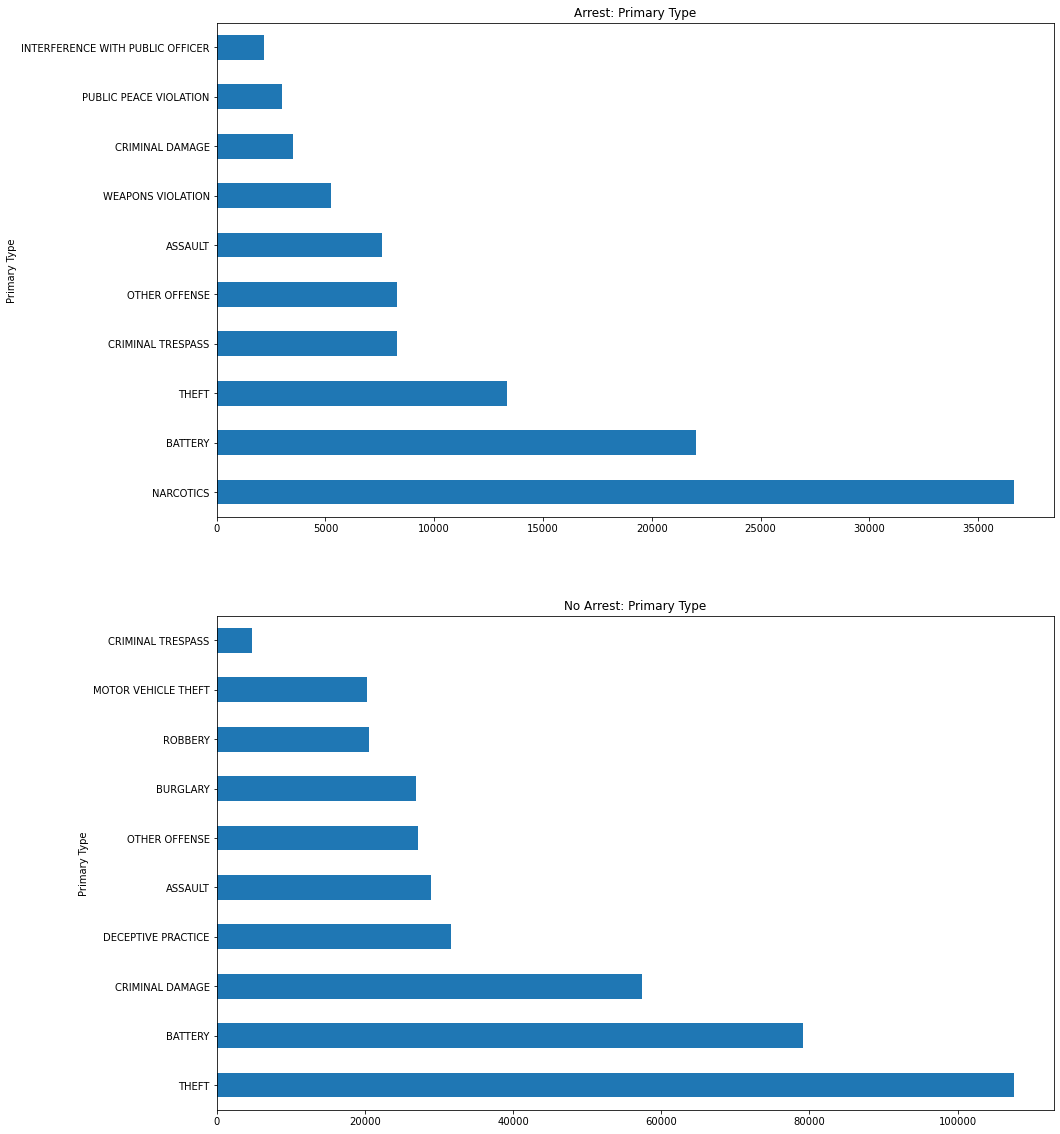

In [27]:
fn_barplot(df, 'Primary Type')

Criminals related to crime like narcatocis and battery are most likely to get arrested. <br/>
People who are involved in theft are less likely to get arrested. 

In [28]:
## Convert values into percentages
arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

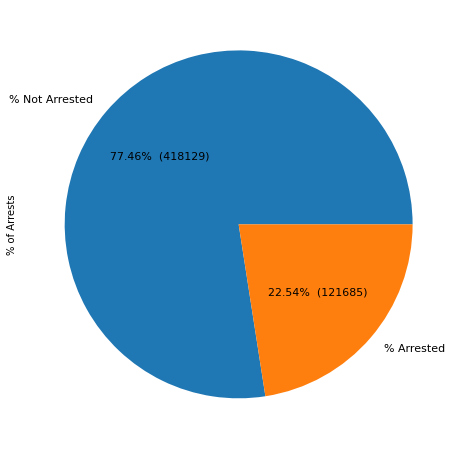

In [29]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8));

From the above chart, we can see that in 77.46% of the cases, Criminals are not Arrested.

In [30]:
## Group dataset by year and arrests
arrest_per_year = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2015,False,193598,73.612806
2015,True,69397,26.387194
2016,False,215076,81.019506
2016,True,50386,18.980494
2017,False,9455,83.252620
2017,True,1902,16.747380


From the above table, we see that<br/>
1. In 2015, Less no of criminals were arrested due to which there was a sudden increase in the rate of crimes.
2. The no. of criminals getting arrested for doing crime has comparatively reduced over time. (26% > 19% > 17%)  

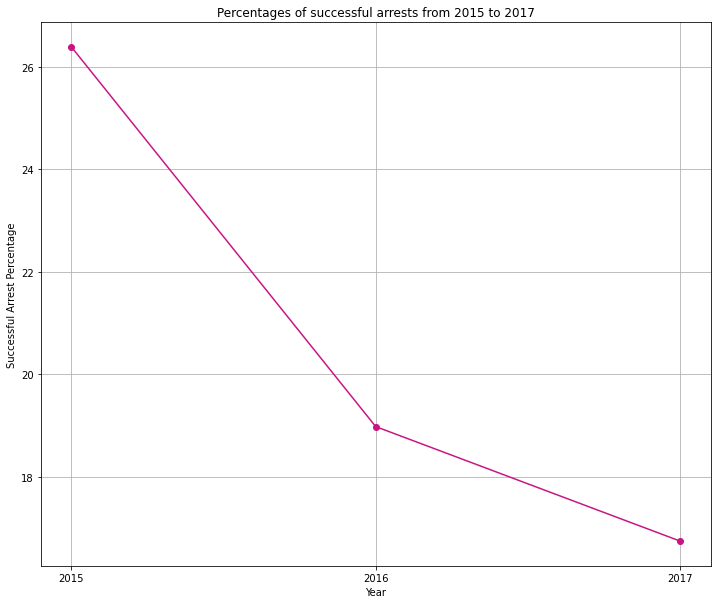

In [31]:
## Create a line plot for percentages of successful arrests over time (2015 to present)
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10));
plt.title('Percentages of successful arrests from 2015 to 2017');
plt.xlabel("Year");
plt.ylabel("Successful Arrest Percentage");
plt.xticks(line_plot.index, line_plot.index.values);

line_plot.plot(grid=True, marker='o', color='mediumvioletred');

No. of crimes in 2017 has comparitively reduced.

In [32]:
## Clean data, create copy, and filter based on this month (March 2017)
cleaned_df = df[df['Latitude'].notnull() & df['Longitude'].notnull()].copy()
cleaned_df['Date Time'] = pd.to_datetime(cleaned_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
cleaned_df = cleaned_df[cleaned_df['Date Time']  > datetime.datetime(2015, 2, 28)]
print("Number of crimes in Chicago since start of March 2015: %d" % len(cleaned_df))

Number of crimes in Chicago since start of March 2015: 475240


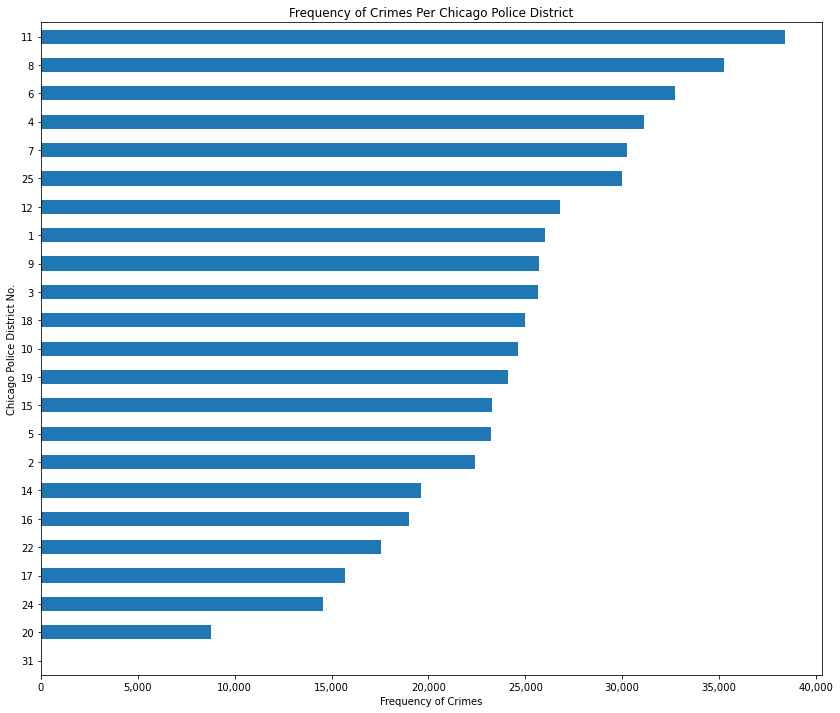

In [33]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

Frequency of Crimes in District 11 is more than any other districts in Chicago

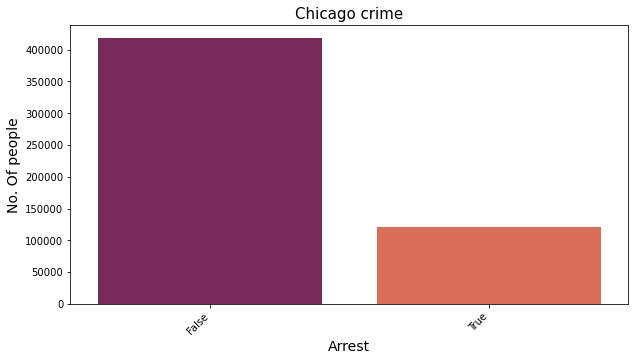

In [34]:
plt.figure(figsize = (10,5))
g = sns.countplot('Arrest', data = df, palette="rocket", order = df['Arrest'].value_counts()[:5].index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Chicago crime", fontsize=15)
g.set_xlabel("Arrest", fontsize=14)
g.set_ylabel("No. Of people", fontsize=14)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

From 2015 to 2017, Less than 150,000 people were only arrested for committing crime.

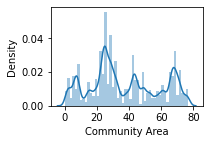

In [35]:
plt.subplot(221)
g1 = sns.distplot(df['Community Area'])

Higher number of Crimes occur in Community Area between 20-40. 

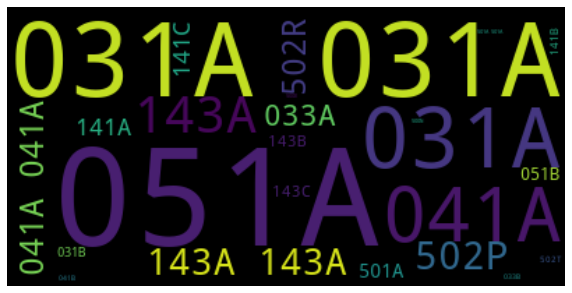

In [36]:
##Join single string of IUCR Codes
crime_types_code = " ".join(crime for crime in df["IUCR"])

##Create and Geneate a word Cloud image
crime_code_wordcloud = WordCloud().generate(crime_types_code)

##Plot WOrdCLoud Image
plt.figure(figsize = [10,10])
plt.imshow(crime_code_wordcloud, interpolation = "bilinear")
plt.axis("off")

plt.show()

#### We can see that the most Frequent codes were 51A and 31A which shows Assault and Roberry with Aggrevated Handgun(Assault) and Robbery by Armed HandGun with Chicago Data Portal Link 

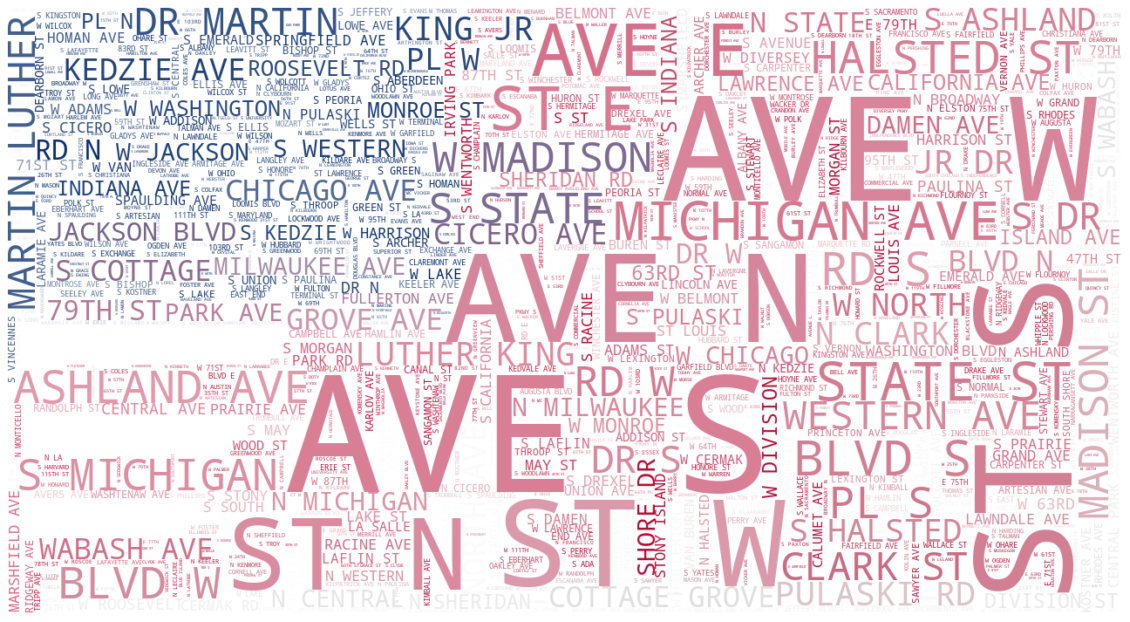

In [37]:
##Drop NAN values in ["Block"] Column
df_wordcloud = df.copy()
df_wordcloud.dropna(axis = 0, subset = ["Block"], inplace = True)

#Creating string of Block Codes and USA flag image mask
crime_type_location = " ".join(crime for crime in df_wordcloud["Block"])
mask = np.array(Image.open("us.jpeg"))

#Creating and generating a wordcloud image
crime_location_wordcloud = WordCloud(background_color = "white", mode  = "RGBA", 
                                     max_words= 1000, mask=mask).generate(crime_type_location)

##Creating a coloring from imageand plot wordcloud
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(crime_location_wordcloud.recolor(color_func=image_colors),interpolation = "bilinear" )
plt.axis("off")

plt.show()

#### (HIGHLY FREQUENCY CRIME OCCURENCE) 
##### Michigan Ave, Halsted St, Ashland Ave, State St, Madison St, Pulaski Rd, Luther King, Martin Luther, Western Ave 

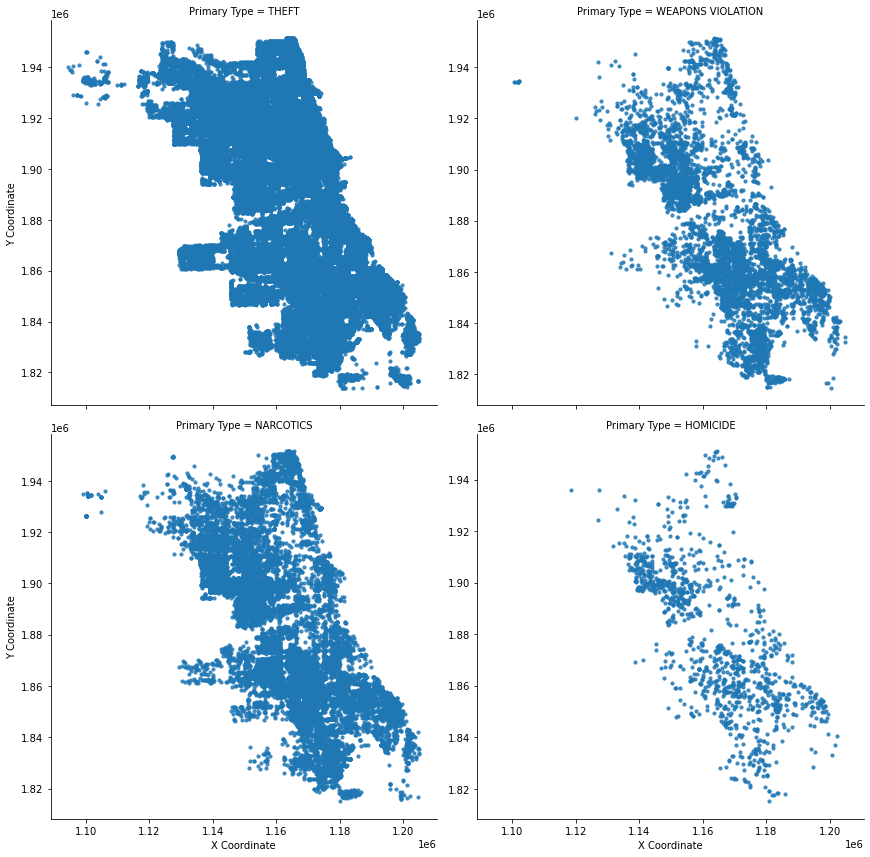

In [38]:
cols = ['Date', 'Primary Type', 'Arrest', 'Domestic', 'District', 'X Coordinate', 'Y Coordinate']
multiple_crimes = df_crime[cols]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                                  .isin(['THEFT', 'NARCOTICS', 'WEAPONS VIOLATION', 'HOMICIDE'])]

multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]

g = sns.lmplot(x= "X Coordinate", 
               y= "Y Coordinate",
               col="Primary Type", 
               data = multiple_crimes.dropna(), 
               col_wrap=2 ,size = 6 ,fit_reg=False, sharey =False,
               scatter_kws={"marker": "D","s":10})

In [39]:
import folium
Chicago_CoOrdinates = [41.881832, -87.623177]
chicago_map = folium.Map(location = Chicago_CoOrdinates, zoom_start=11 )

In [40]:
def fn_crime_map(crime_type):
    Crimes = df[df['Primary Type'] == crime_type]
    locations = Crimes.groupby('Community Area').first()
    new_locations = locations.loc[:,['Latitude', 'Longitude', 'Location Description', 'Arrest']]
    
    for i in range (len(new_locations)):
        lat = new_locations[i][0]
        long = new_locations[i][1]
        popup_text = """Community Index :{}<br> 
                    Arrest : {}<br>
                    Location Dexcription :{}<br>"""
        popup_text = popup_text.format(new_locations.index[i], new_locations.iloc[i][-1], new_locations.iloc[i][-2])
        folium.CircleMarker(location = [lat, long], popup = popup_text, fill = True).add_to(chicago_map) 
    return chicago_map  

In [41]:
fn_crime_map('t')

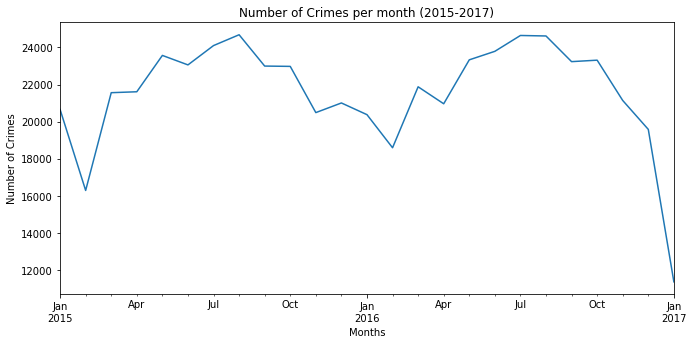

In [42]:
plt.figure(figsize=(11,5))

#resampling timeseries by months
df.resample('M').size().plot(legend=False)
plt.title('Number of Crimes per month (2015-2017)')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.show()

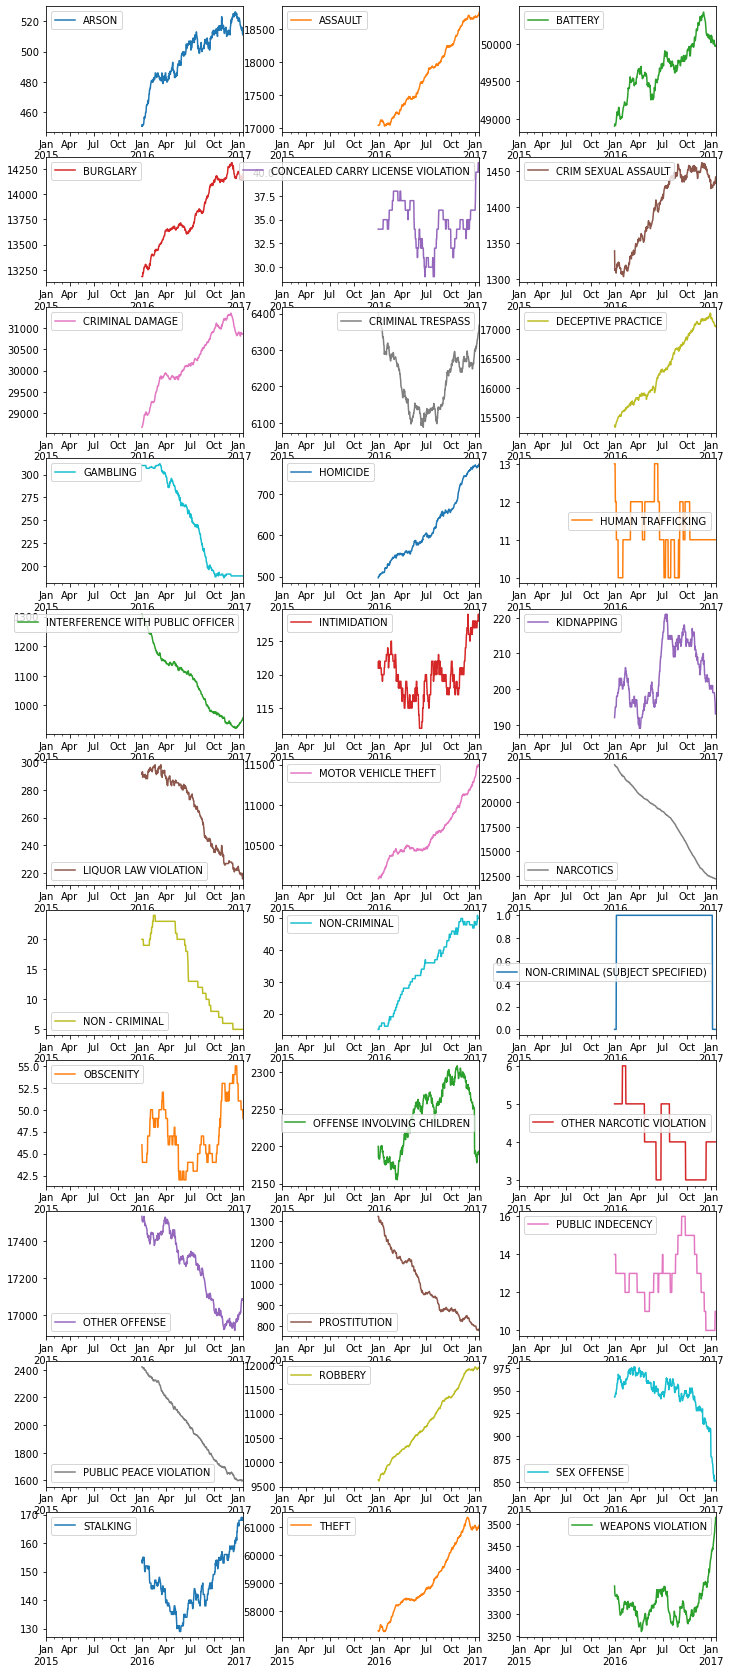

In [43]:
crimes_count_date = df.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type',  index = df.index.date, fill_value = 0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(12,30), subplots = True, layout = (-1,3), sharex= False)

#### Arson, Concealed Carry, Sexual Assault, Obscenity, Deceptive Practice,  Homicide, Non-criminal, Robbery, Theft, Weapons Violation, Criminal Damage, Motor Vehicle Theft, Human Trafficking, Stalking. 
From above, we can notice that the following crimes have an increasing trend although the general trend of crimes is decreasing.

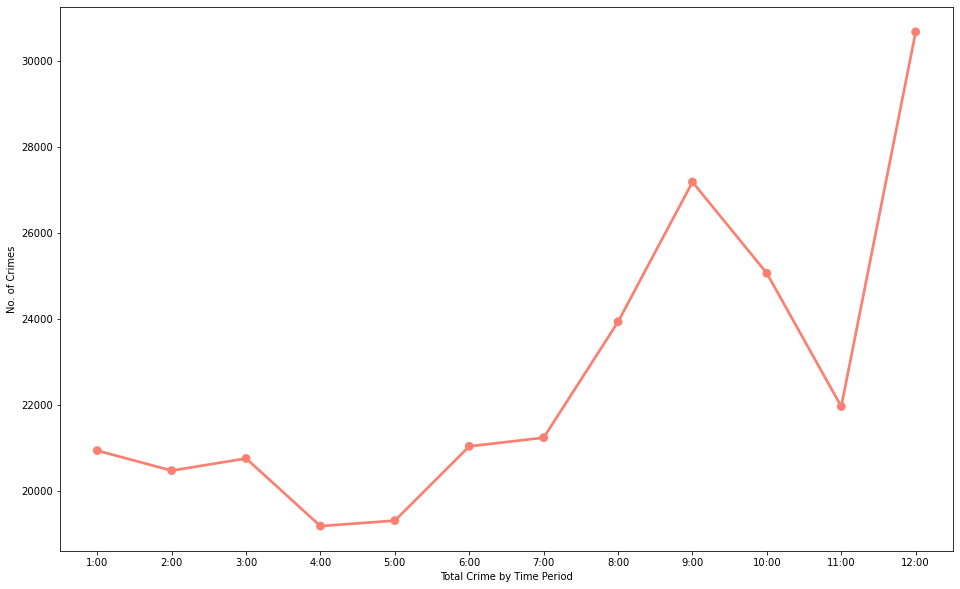

In [44]:
#Plot time by time period
#Just to see overall crime trend by hourly we can see which time has amount of of crime
crimes_by_time = df.copy()

#Top 10 crime type as seen above
primary_types = ["ARSON", 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 
                 'DECEPTIVE PRACTICE', 'HOMICIDE', 'ROBBERY', 'THEFT', 'WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT', 
                 'CRIMINAL DAMAGE' ]
##Filter out rows with top 10 crimes mentioned
crimes_by_time = crimes_by_time[crimes_by_time['Primary Type'].isin(primary_types)]

#Group times by hour
crimes_by_time = crimes_by_time.groupby('time_hour').size().reset_index(name = 'No. of Crimes')
crimes_by_time['hours'] = crimes_by_time ['time_hour'].apply(lambda x: str(x)+':00')

fig = plt.figure(figsize=(16,10))
sns.pointplot(data = crimes_by_time, x = "hours", y = "No. of Crimes", color = "salmon")

plt.xlabel('Time')
plt.ylabel('No. of Crimes')
plt.xlabel('Total Crime by Time Period')
plt.show()

There is an increase in crimes happening after 7PM  

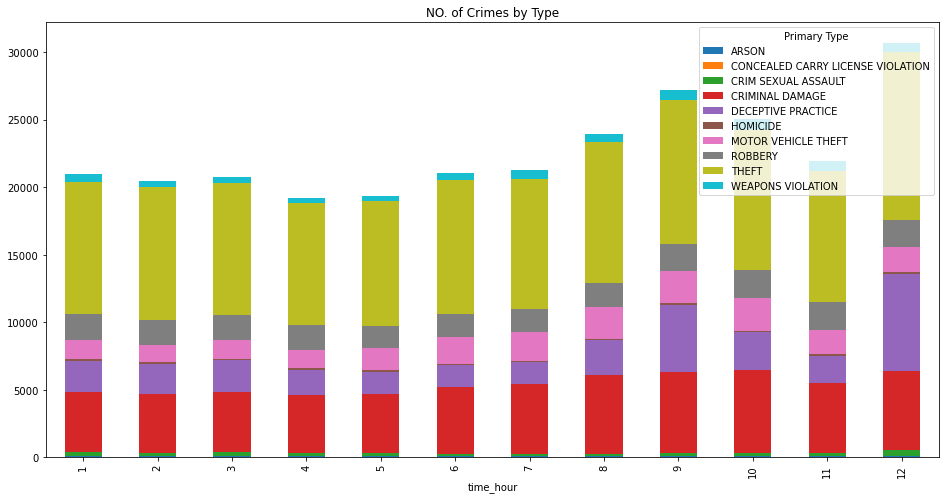

In [45]:
crimes_by_type = df.copy()
crimes_by_type = crimes_by_type[crimes_by_type['Primary Type'].isin(primary_types)]
crimes_by_type = crimes_by_type.groupby(['time_hour', 'Primary Type']).size().reset_index(name = "No. of Crimes")

##Format hour data
crimes_by_type['hours'] = crimes_by_type['time_hour'].apply(lambda x: str(x)+ ':00')

#Create crime type by pivot table
crimes_by_type_pivot = pd.pivot_table(crimes_by_type, index=['time_hour'], columns= ['Primary Type'], values = "No. of Crimes", aggfunc = np.sum)

crimes_by_type_pivot.plot(kind = 'bar' , stacked = True , figsize=(16,8), title = "NO. of Crimes by Type");

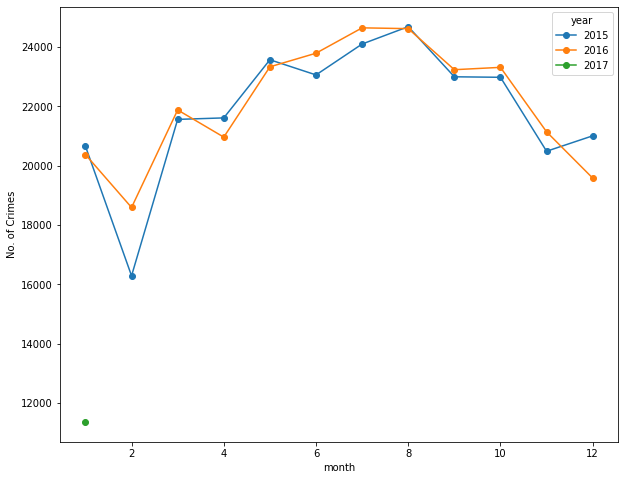

In [46]:
df.groupby(['month' , 'year'])['ID'].count().unstack().plot(marker = 'o', figsize = (10,8))
plt.ylabel("No. of Crimes")
plt.show()

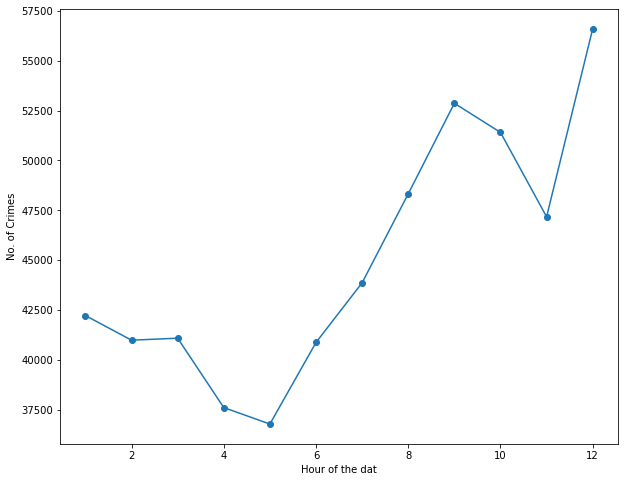

In [47]:
df.groupby(['time_hour'])['ID'].count().plot(marker = 'o', figsize = (10,8))
plt.ylabel("No. of Crimes")
plt.xlabel("Hour of the dat")
plt.show()

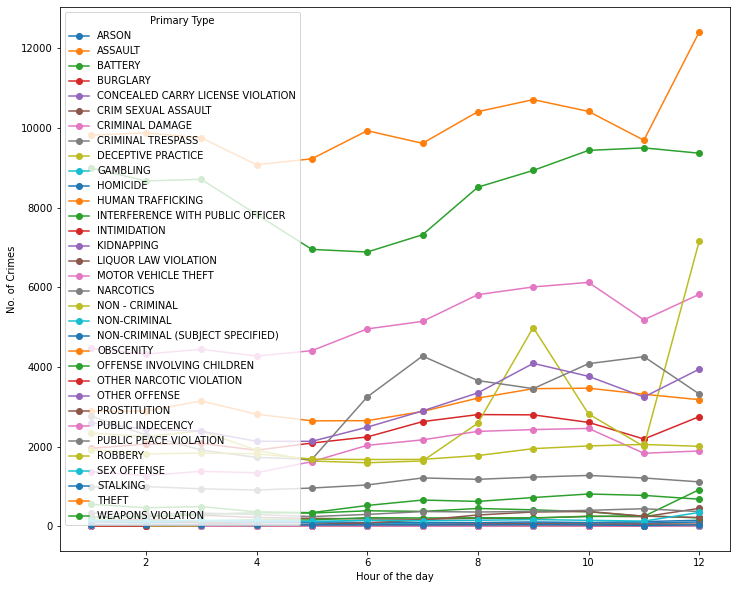

In [48]:
df.groupby(['time_hour', 'Primary Type'])['ID'].count().unstack().plot(marker = 'o', figsize = (12,10))
plt.ylabel("No. of Crimes")
plt.xlabel("Hour of the day")
plt.show()

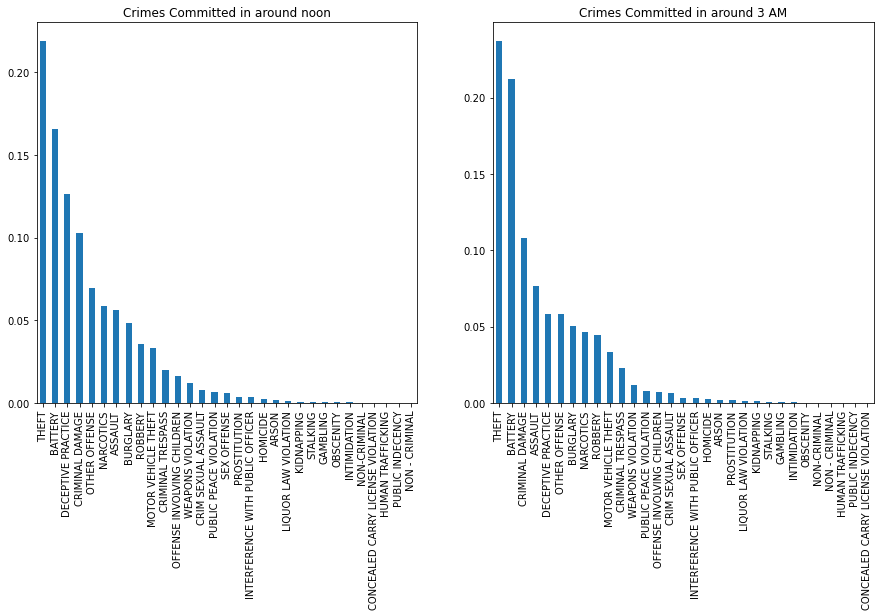

In [49]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize = (15,7))
df[df['time_hour'] == 12]['Primary Type'].value_counts(normalize=True).plot.bar(ax=ax1, title = "Crimes Committed in around noon");
df[df['time_hour'] == 3]['Primary Type'].value_counts(normalize=True).plot.bar(ax=ax2, title = "Crimes Committed in around 3 AM");

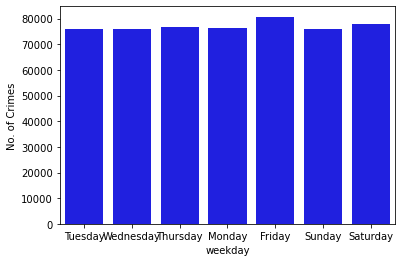

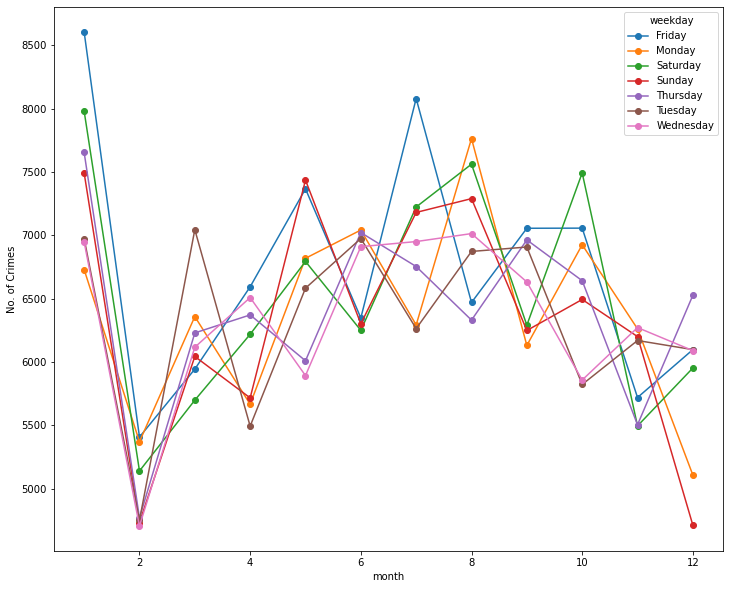

In [50]:
dayOfWeek = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['weekday'] = df['Date_weekday'].map(dayOfWeek)
sns.countplot(x = 'weekday', data = df, color = ('blue'))
plt.ylabel("No. of Crimes")
plt.show()

df.groupby(['month', 'weekday'])['ID'].count().unstack().plot(marker = 'o', figsize = (12,10))
plt.ylabel("No. of Crimes")
plt.show()

### Bivariate Analysis

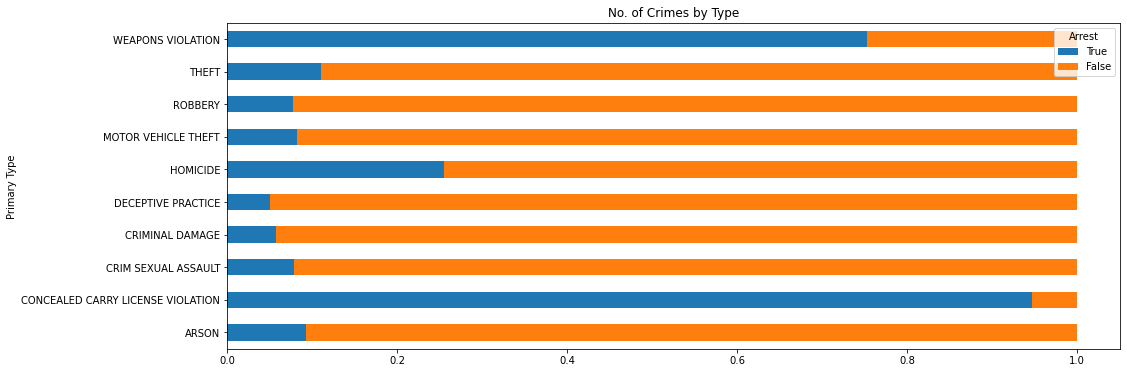

In [53]:
#Plot time by arrest
#Just to see overall crime trend by hourly we can see which time has amount of of crime
crimes_by_arrest = df.copy()
crimes_by_arrest = crimes_by_arrest.groupby(['Primary Type', 'Arrest']).size().reset_index(name = 'No. of Crimes')

crimes_by_arrest = crimes_by_arrest[crimes_by_arrest['Primary Type'].isin(primary_types)]


crimes_by_arrest_pivot = pd.pivot_table(crimes_by_arrest, index = ['Primary Type'], columns = 'Arrest', values = "No. of Crimes", aggfunc = np.sum)

crimes_by_arrest_pivot= crimes_by_arrest_pivot.reset_index()
crimes_by_arrest_pivot['Total No'] = crimes_by_arrest_pivot[True] + crimes_by_arrest_pivot [False]
crimes_by_arrest_pivot['True'] = crimes_by_arrest_pivot [True] / crimes_by_arrest_pivot['Total No']
crimes_by_arrest_pivot['False'] = crimes_by_arrest_pivot[False] /crimes_by_arrest_pivot['Total No']
crimes_by_arrest_pivot = crimes_by_arrest_pivot[['Primary Type', 'True', 'False']]
crimes_by_arrest_pivot = crimes_by_arrest_pivot.set_index('Primary Type')

crimes_by_arrest_pivot.plot(kind = 'barh', stacked = True, figsize = (16,6), title = "No. of Crimes by Type");

In [52]:
#Major Crimes MOnthly Arrest Analysis

df['Details'] = df['Primary Type']+ ', ' + df['Description']
top_crimes = df.groupby(['Details']) ['Arrest'].count()

top_crimes = pd.DataFrame(top_crimes).nlargest(10, 'Arrest').reset_index()
top_crimes = list(top_crimes['Details'])
top_crimes

['BATTERY, DOMESTIC BATTERY SIMPLE',
 'THEFT, $500 AND UNDER',
 'BATTERY, SIMPLE',
 'CRIMINAL DAMAGE, TO VEHICLE',
 'THEFT, OVER $500',
 'CRIMINAL DAMAGE, TO PROPERTY',
 'ASSAULT, SIMPLE',
 'THEFT, FROM BUILDING',
 'MOTOR VEHICLE THEFT, AUTOMOBILE',
 'THEFT, RETAIL THEFT']

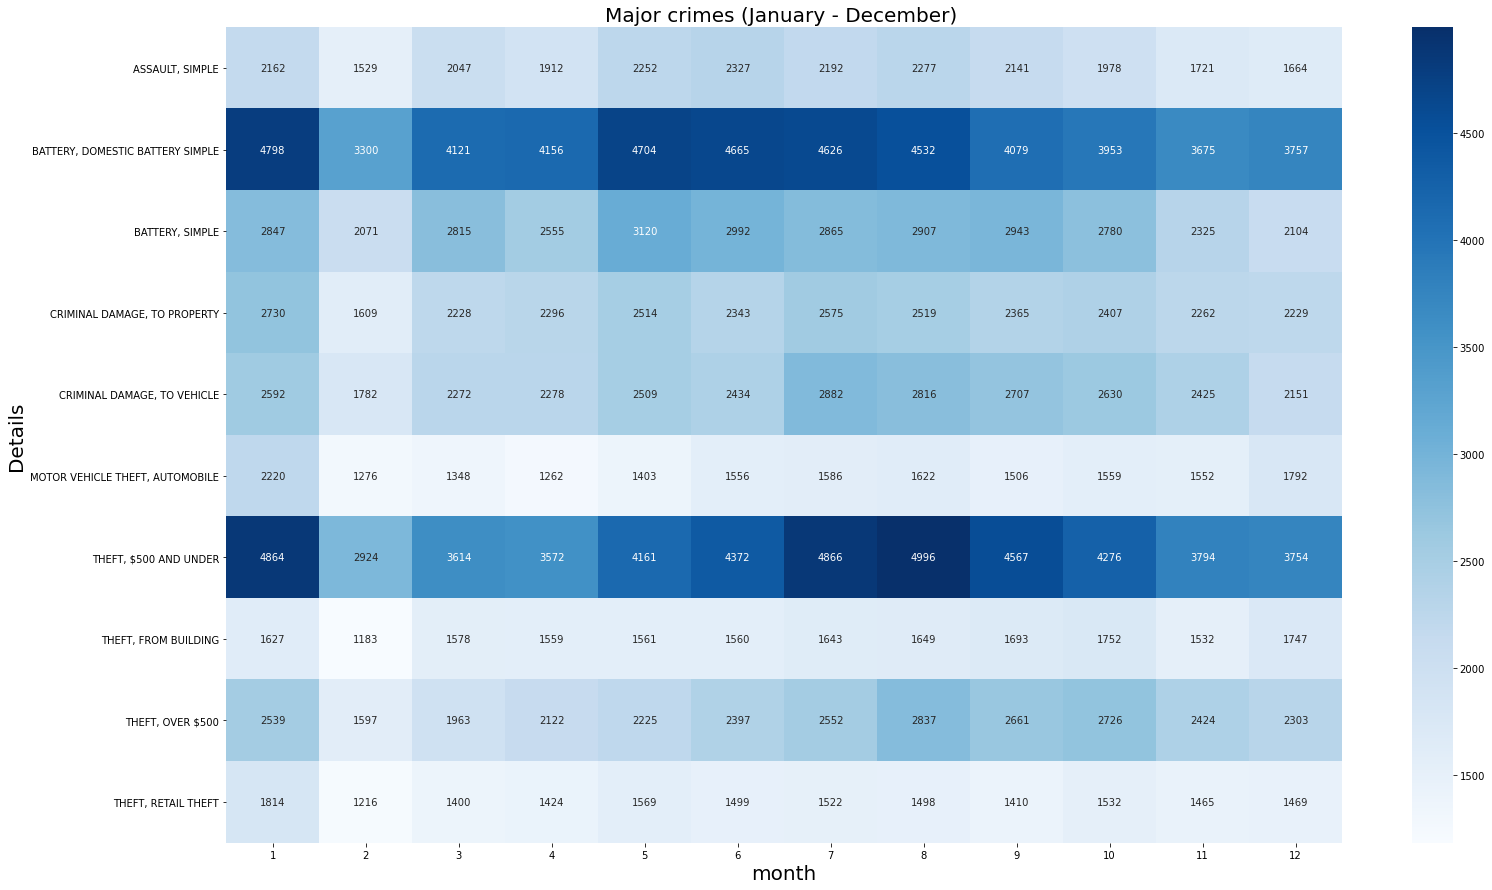

In [55]:
df2 = df.groupby(['Details', 'month'])['Arrest'].count()
DIMS = (25,15)
fig = plt.figure(figsize = DIMS)
axl = fig.add_subplot(111)

axl.set_title('Major crimes (January - December) ', fontsize=20)
axl.set_ylabel('Details', fontsize=20)

axl.set_xlabel('month', fontsize=20)

# Get top 20 data
df2 = pd.DataFrame (df2) .reset_index ()
df2 = df2[df2['Details'].isin(top_crimes)]

# Pivot data to 2D table, and fill all na values
df2 = df2.pivot_table (index='Details',columns='month',values='Arrest')
df2.fillna(0, inplace=True)

# Create heatmap
sns.heatmap (df2,cmap="Blues", annot=True, fmt='g');

### Checking for Outliers

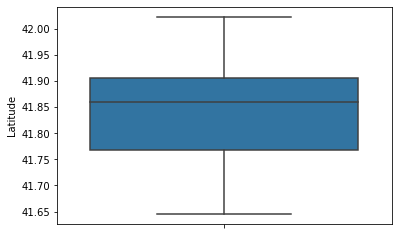

In [54]:
sns.boxplot(y = df['Latitude']);

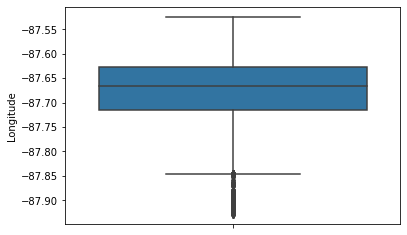

In [55]:
sns.boxplot(y = df['Longitude']);

### Correlation Matrix

In [56]:
df.corr()

,ID,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,time_hour,month,year,Date_weekday
ID,1.000000,-0.054090,0.009805,0.007749,0.007788,0.012681,-0.019458,0.387028,0.018223,0.003893,0.005515,0.180073,0.387028,-0.009260
Arrest,-0.054090,1.000000,-0.040644,-0.022772,-0.023044,-0.013629,0.029167,-0.088527,-0.029778,-0.032242,0.004403,-0.050243,-0.088527,-0.001187
Domestic,0.009805,-0.040644,1.000000,-0.053104,-0.053016,-0.075190,0.086124,0.003584,-0.101886,0.017856,0.001413,-0.009186,0.003584,0.029904
Beat,0.007749,-0.022772,-0.053104,1.000000,0.999867,0.675949,-0.488397,0.004296,0.629275,-0.551853,-0.000830,-0.001062,0.004296,0.016694
District,0.007788,-0.023044,-0.053016,0.999867,1.000000,0.677337,-0.489122,0.004326,0.630445,-0.552586,-0.000795,-0.001036,0.004326,0.016651
Ward,0.012681,-0.013629,-0.075190,0.675949,0.677337,1.000000,-0.540296,0.007949,0.658689,-0.445685,-0.011990,0.003537,0.007949,0.013599
Community Area,-0.019458,0.029167,0.086124,-0.488397,-0.489122,-0.540296,1.000000,-0.015082,-0.781616,0.248100,0.012937,-0.007947,-0.015082,-0.014268
Year,0.387028,-0.088527,0.003584,0.004296,0.004326,0.007949,-0.015082,1.000000,0.012259,0.002754,-0.006541,-0.099844,1.000000,-0.005703
Latitude,0.018223,-0.029778,-0.101886,0.629275,0.630445,0.658689,-0.781616,0.012259,1.000000,-0.547956,-0.009732,0.007066,0.012259,0.011061
Longitude,0.003893,-0.032242,0.017856,-0.551853,-0.552586,-0.445685,0.248100,0.002754,-0.547956,1.000000,-0.012741,0.008142,0.002754,-0.004374


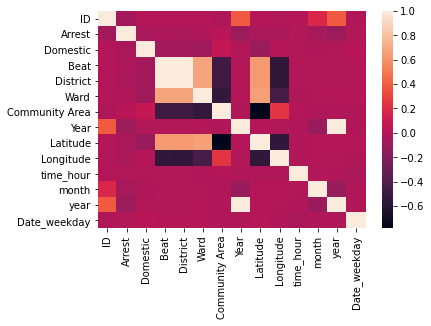

In [57]:
dataplot=sns.heatmap(df.corr())

Here, we can see that Beat and District are highly correlated

## IV and WOE

In [58]:
#We get the name and data type of each column for IV and WoE analysis
col_dict1 = chicago.dtypes.to_dict()
del [col_dict1['Date'], col_dict1['Latitude'],
     col_dict1['Longitude'], col_dict1['Area(km2)'], col_dict1['Arrest'], col_dict1['ID']]
col_dict1

{'Block': dtype('O'),
 'IUCR': dtype('O'),
 'Primary Type': dtype('O'),
 'Description': dtype('O'),
 'Location Description': dtype('O'),
 'Domestic': dtype('O'),
 'Beat': dtype('int64'),
 'District': dtype('int64'),
 'Ward': dtype('float64'),
 'Community Area': dtype('int32'),
 'FBI Code': dtype('O'),
 'Year': dtype('int64'),
 'time_hour': dtype('int64'),
 'month': dtype('int64'),
 'Date_weekday': dtype('int64'),
 'COMMUNITY': dtype('O'),
 '2017population': dtype('float64'),
 'pop_dense': dtype('float64')}

In [59]:
obj_cols = []
iv = pd.DataFrame()
for i,j in col_dict1.items():
    
    
    if j == 'object':
        
        t = chicago.pivot_table( index = i , values = 'ID', columns = 'Arrest', aggfunc = 'count')
        t['Name']      =  i
        t['good_dist'] =  t[0]/ t[0].sum()
        t['bad_dist']  =  t[1]/ t[1].sum()
        t['WoE']       = np.log(t['good_dist'] / t['bad_dist'])
        t              = t.replace({'WoE': {np.inf: 0, -np.inf: 0}})
        t['iv_i']      =  (t['good_dist'] - t['bad_dist']) * t['WoE']
        t['IV']        =  t['iv_i'].sum()    
        
        iv             =  iv.append(t)
        obj_cols.append(i)
        
    else :
        
        chicago['qcut'] =  pd.qcut( chicago[i] , 10, duplicates = 'drop')
        t = chicago.pivot_table( index = 'qcut' , values = 'ID', columns = 'Arrest', aggfunc = 'count')
        t['Name']      =  i
        t['good_dist'] =  t[0]/ t[0].sum()
        t['bad_dist']  =  t[1]/ t[1].sum()
        t['WoE']       = np.log(t['good_dist'] / t['bad_dist'])
        t              = t.replace({'WoE': {np.inf: 0, -np.inf: 0}})
        t['iv_i']      =  (t['good_dist'] - t['bad_dist']) * t['WoE']
        t['IV']        =  t['iv_i'].sum()
        t              =  t.reset_index()
        iv             =  iv.append(t)


In [60]:
iv.sort_values(by='WoE').head(20)
#as it can be seen here, if a person is caught with cannabis which has IUCR code 1811(narcotics), he/she
#is most likely to be arrested 

Arrest,False,True,Name,good_dist,bad_dist,WoE,iv_i,IV,qcut
POSS: CANNABIS 30GMS OR LESS,4.0,13740.0,Description,0.000010,0.117902,-9.359495,1.103413,4.027394,NaN
1811,4.0,13740.0,IUCR,0.000010,0.117902,-9.359495,1.103413,4.069594,NaN
POSS: CRACK,1.0,2794.0,Description,0.000003,0.023975,-9.152953,0.219421,4.027394,NaN
2027,1.0,2794.0,IUCR,0.000003,0.023975,-9.152953,0.219421,4.069594,NaN
NARCOTICS,14.0,33489.0,Primary Type,0.000036,0.287368,-8.997638,2.585313,3.668502,NaN
POSS: HEROIN(WHITE),3.0,5576.0,Description,0.000008,0.047847,-8.745338,0.418376,4.027394,NaN
2024,3.0,5576.0,IUCR,0.000008,0.047847,-8.745338,0.418376,4.069594,NaN
18,18.0,32894.0,FBI Code,0.000046,0.282262,-8.728397,2.463298,3.480442,NaN
MANU/DELIVER: HEROIN (WHITE),1.0,1678.0,Description,0.000003,0.014399,-8.643081,0.124429,4.027394,NaN
2014,1.0,1678.0,IUCR,0.000003,0.014399,-8.643081,0.124429,4.069594,NaN


In [61]:
iv.sort_values(by = 'IV', ascending = False).head(20)
#The most important feature in our data for predicting arrest is the IUCR code

Arrest,False,True,Name,good_dist,bad_dist,WoE,iv_i,IV,qcut
0558,51.0,33.0,IUCR,0.000129,0.000283,-0.782405,1.202369e-04,4.069594,NaN
2010,NaN,6.0,IUCR,NaN,0.000051,NaN,NaN,4.069594,NaN
2018,NaN,70.0,IUCR,NaN,0.000601,NaN,NaN,4.069594,NaN
2017,NaN,580.0,IUCR,NaN,0.004977,NaN,NaN,4.069594,NaN
2016,NaN,55.0,IUCR,NaN,0.000472,NaN,NaN,4.069594,NaN
2015,NaN,39.0,IUCR,NaN,0.000335,NaN,NaN,4.069594,NaN
2014,1.0,1678.0,IUCR,0.000003,0.014399,-8.643081,1.244286e-01,4.069594,NaN
2013,NaN,45.0,IUCR,NaN,0.000386,NaN,NaN,4.069594,NaN
2012,NaN,77.0,IUCR,NaN,0.000661,NaN,NaN,4.069594,NaN
2011,NaN,27.0,IUCR,NaN,0.000232,NaN,NaN,4.069594,NaN


# 4. Modelling

In [62]:
from sklearn.preprocessing import OrdinalEncoder
obj_cols.append('Domestic')
chicago[obj_cols] = OrdinalEncoder().fit_transform(chicago[obj_cols])


from sklearn.preprocessing import LabelEncoder
chicago['Arrest'] = LabelEncoder().fit_transform(chicago['Arrest'])

chicago.drop(columns = ['qcut','COMMUNITY'], inplace = True)
chicago.set_index('ID', inplace = True)

## Splitting the Data into train and test

In [63]:
from sklearn.model_selection import train_test_split

X = chicago.copy()
X.drop(columns = ['Arrest','Date'], inplace = True)
y = chicago['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [64]:
#As we did a stratified split, the distribution of classes is equal in train and test set
display( y_train.value_counts(normalize = True)*100 , y_test.value_counts(normalize = True)*100)

0    77.166376
1    22.833624
Name: Arrest, dtype: float64

0    77.165809
1    22.834191
Name: Arrest, dtype: float64

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Boosting methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Bagging method
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve

from xgboost import XGBClassifier

### Using Pipeline 
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.


In [66]:
# Spot Checking and Comparing Algorithms With StandardScaler Scaler

pipelines=[]
pipelines.append(('Logisitic Regression',Pipeline([('LogisticRegression',LogisticRegression())])))
pipelines.append(('KNN',Pipeline([('KNN',KNeighborsClassifier(n_neighbors=5))])))
pipelines.append(('SVC',Pipeline([('SVC',SVC(kernel = 'linear'))])))
pipelines.append(('DecisionTree',Pipeline([('decision',DecisionTreeClassifier())])))
pipelines.append(('Ada Boosting ',Pipeline([('AB',AdaBoostClassifier())])))
pipelines.append(('Gradient Boosting ',Pipeline([('GBc',GradientBoostingClassifier())])))
pipelines.append(('Random Forest ',Pipeline([('rf',RandomForestClassifier())])))

In [48]:
# Evaluating Each model
names=[]
predictions=[]
for name,model in pipelines:
    fold=KFold(n_splits=10)
    result=cross_val_score(model,X_train,y_train,cv=fold,scoring='accuracy')
    predictions.append(result)
    names.append(name)
    print(name," : ", "%0.2f accuracy with a standard deviation of %0.4f" % (result.mean(), result.std()))
    print('-----------------------------------------------------------------------------------')

Logisitic Regression  :  0.76 accuracy with a standard deviation of 0.0020
-----------------------------------------------------------------------------------
KNN  :  0.86 accuracy with a standard deviation of 0.0015
-----------------------------------------------------------------------------------
SVC  :  nan accuracy with a standard deviation of nan
-----------------------------------------------------------------------------------
DecisionTree  :  0.84 accuracy with a standard deviation of 0.0014
-----------------------------------------------------------------------------------
Ada Boosting   :  0.87 accuracy with a standard deviation of 0.0016
-----------------------------------------------------------------------------------
Gradient Boosting   :  0.89 accuracy with a standard deviation of 0.0014
-----------------------------------------------------------------------------------
Random Forest   :  0.88 accuracy with a standard deviation of 0.0013
--------------------------------

### Since Gradient Boosting has the high accuracy i.e 89%, we have used it for Prediction

### XGB Classifier

In [ ]:
lr = [0.01, 0.1, 0.3]
depth = [3,5,6]
estimators = [100,200,300]
model_performance_data = []

for i in lr :
    for j in depth :
        for k in estimators :
            
            xgb = XGBClassifier(learning_rate = i, max_depth = j, n_estimators = k, random_state = 42)
            xgb.fit(X_train, y_train)
            y_pred_train = xgb.predict(X_train)
            y_pred_test = xgb.predict(X_test)
            
            auc_xgb_train=roc_auc_score(y_train, xgb.predict_proba(X_train)[:,1])
            auc_xgb_test=roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
            
            t1 = "learning rate: "+str(i)+" , "+"depth "+str(j)+" , "+" estimators "+str(k)
            t = [t1, round(metrics.accuracy_score(y_train, y_pred_train)*100,4), round(metrics.accuracy_score(y_test, y_pred_test)*100,4), auc_xgb_train, auc_xgb_test]
            
            model_performance_data.append(t)

In [41]:
model_performance_data = pd.DataFrame(model_performance_data)
model_performance_data.rename( columns = {0:'Model Parameters', 1:'Accuracy_train', 2:'Accuracy_test', 3:'auc_train', 4:'auc_test'}, inplace = True)

In [44]:
model_performance_data.sort_values('auc_test', ascending = False)

,Model Parameters,Accuracy_train,Accuracy_test,auc_train,auc_test
25,"learning rate: 0.3 , depth 6 , estimators 200",89.9894,89.3206,0.926631,0.908514
23,"learning rate: 0.3 , depth 5 , estimators 300",89.8953,89.3882,0.924547,0.908419
26,"learning rate: 0.3 , depth 6 , estimators 300",90.2360,89.3490,0.933207,0.908192
17,"learning rate: 0.1 , depth 6 , estimators 300",89.6463,89.3039,0.918499,0.908139
22,"learning rate: 0.3 , depth 5 , estimators 200",89.6997,89.3402,0.919744,0.907837
24,"learning rate: 0.3 , depth 6 , estimators 100",89.6881,89.2628,0.918666,0.907614
16,"learning rate: 0.1 , depth 6 , estimators 200",89.5138,89.2393,0.914479,0.907303
14,"learning rate: 0.1 , depth 5 , estimators 300",89.4354,89.1932,0.913019,0.907153
21,"learning rate: 0.3 , depth 5 , estimators 100",89.4888,89.2559,0.913036,0.906928
13,"learning rate: 0.1 , depth 5 , estimators 200",89.2980,89.1031,0.910165,0.906148


In [39]:
xgb = XGBClassifier(learning_rate = 0.3, max_depth = 6, n_estimators = 200, random_state = 42)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
            
auc_xgb_train=roc_auc_score(y_train, xgb.predict_proba(X_train)[:,1])
auc_xgb_test=roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])

[15:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


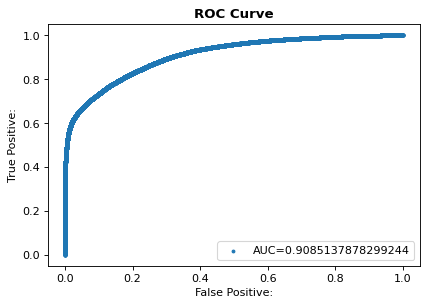

In [40]:
xgb_fp,xgb_tp,thresholds = roc_curve(y_test,xgb.predict_proba(X_test)[:,1])

auc_xgb=roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])

fig = plt.figure(dpi=80)
plt.scatter(xgb_fp,xgb_tp, s=6,label="AUC="+str(auc_xgb))
plt.title('ROC Curve', fontweight = 'bold', fontsize = 12)
plt.legend(loc=4)
plt.xlabel('False Positive:', fontsize = 10)
plt.ylabel('True Positive:', fontsize = 10);

In [44]:
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
%matplotlib inline
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     78767
           1       0.89      0.61      0.72     23308

    accuracy                           0.89    102075
   macro avg       0.89      0.79      0.83    102075
weighted avg       0.89      0.89      0.89    102075



<AxesSubplot:>

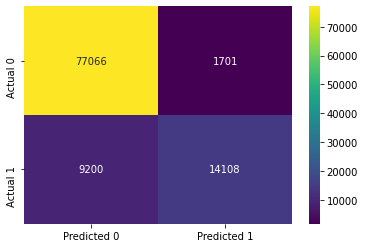

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_test))


plot_confusion_matrix(y_test, y_pred_test)

<AxesSubplot:>

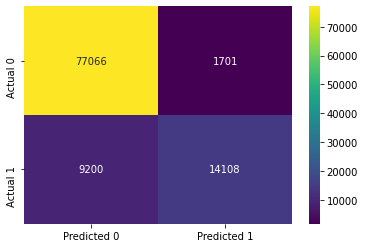

In [45]:
plot_confusion_matrix(y_test, y_pred_test)

## Conclusion